# Analysis on Historical Video Game Sales // Planning for the Upcoming Year 

In this project, we'll be examining historical data on game sales to identify patterns that determine whether or not a game succeeds.  Our goal is to spot potential big winners and plan advertising campaigns.

To do this, we'll examine how sales vary from platform to platform.  Which platforms are leading in sales?  Which ones are growing vs shrinking?

## Introducing Our Data

### Preliminaries

We'll start by importing the libraries we'll use for our analysis.  We'll then read in our CSV file.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
df = pd.read_csv("/games.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/datasets/games.csv'

### First Look

Let's get a sense of our DataFrame below.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
df.shape

(16715, 11)

In [ ]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [ ]:
df.tail(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In our DataFrame, each row represents a released video game.  We have 11 columns that provide the following: the name of the game, the year the game released and on which platform, sales (split by North America, Europe, Japan, and other), and ratings.  Specifically each game has a critic score, a user score, and an overall ESRB rating (similar to how a movie is rated PG, R, etc.).

We also see that we have some missing values in our DataFrame that we'll address later on.

## Data Preparation

We'll prepare our Data by making all of our column names lowercase, filling in missing values, and converting our data to appropriate types.  We'll also add any columns that may be useful for later analysis, such as a `total_sales` column.

### Initial Cleaning

We can make our column names lowercase with the following:

In [ ]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

### Handling Missing Values

We have missing values in the following columns:
- Name
- Year_of_Release
- Genre
- Critic_Score
- User_Score
- Rating

Let's fill our `rating` column first.

In [ ]:
df['rating'].value_counts(dropna=False)

NaN     6766
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

We see that all of our missing values are `NaN`.  Let's replaces these with 'unrated'.

In [ ]:
df['rating'] = df['rating'].fillna('unrated')

Our `genre` column is only missing two values, so let's track those down manually.

In [ ]:
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,unrated
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,unrated


With only some basic sale information, it makes most sense to drop these values. Our calculations later will depend on both genre and scores, and the dropped data represents only two rows out of over 16,000. 

In [ ]:
df.dropna(subset=['genre'], inplace=True)

In [ ]:
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating                0
dtype: int64

We can see that dropping these values also handled the two missing values from the `name` column.

We'll handle our `year_of_release` column next.  It's unlikely that we'll be able to accurately interpolate missing years.  We could fill these values with -1 as a placeholder, but we'll be reducing our dataset based on `year_of_release` later in our anaylsis.  We'll drop these rows from the dataset.

In [ ]:
df.dropna(subset=['year_of_release'], inplace=True)

In [ ]:
df['year_of_release'].isna().sum()

0

We've handled our missing values in this column, so now let's convert the datatype after checking that the resulting column will be equivalent.

In [ ]:
np.array_equal(df['year_of_release'], df['year_of_release'].astype('int'))

True

In [ ]:
df['year_of_release'] = df['year_of_release'].astype('int')

We have two columns left to fill: `critic_score` and `user_score`.  While we don't know with certainty the reason for why missing values occur, there are a few possible explanations.  Perhaps older games did not receive critic scores as frequently as newer games did.  A game may need to be popular enough (minimum number of sales) to warrant receiving a score.

In any case, it is unlikely that we would be able to interpolate missing values in our `critic_score` and `user_score` columns, as these scores by definition are subjective.  We'll fill these columns with -1 and look at only the values we know when it comes time to analyze these columns.

Our `user_score` column contains the value `tbd`.  Because `tbd` is an unknown value, we'll first replace any values of `"tbd"` to be `NaN`.  `"tbd"` means that a score hasn't been determined.  We'll fill all unknowns with -1 as with our `critic_score`.

In [ ]:
df['user_score'].replace('tbd', np.nan, inplace=True)

In [ ]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='raise')

In [ ]:
df['user_score'].isna().sum()

8981

Before we fill this column, it's worth mentioning that our `critic_score` column is on a scale of 0-100, while our `user_score` column is on a scale of `0.0-10.0`.  Before filling the remaining values, let's add a 'standardized user score' column so that we can compare our data easier down the line.

In [ ]:
df['st_user_score'] = df['user_score'] * 10
df['st_user_score'] = df['st_user_score'].round()

In [ ]:
df['st_user_score']

0        80.0
1         NaN
2        83.0
3        80.0
4         NaN
         ... 
16710     NaN
16711     NaN
16712     NaN
16713     NaN
16714     NaN
Name: st_user_score, Length: 16444, dtype: float64

In [ ]:
df[['critic_score', 'user_score', 'st_user_score']] = df[['critic_score', 'user_score', 'st_user_score']].fillna(-1)

In [ ]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
st_user_score      0
dtype: int64

In [ ]:
display(np.array_equal(df['critic_score'], df['critic_score'].astype('int')))
np.array_equal(df['st_user_score'], df['st_user_score'].astype('int'))

True

True

In [ ]:
df['critic_score'] = df['critic_score'].astype('int')
df['st_user_score'] = df['st_user_score'].astype('int')

Let's look at our dataframe now:

In [ ]:
df.sample(10, random_state=1234)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,st_user_score
8617,Naruto: Ultimate Ninja Heroes 2 - The Phantom ...,PSP,2006,Fighting,0.14,0.00,0.00,0.01,64,7.8,T,78
2315,Skylanders: Trap Team,X360,2014,Action,0.54,0.27,0.00,0.08,-1,-1.0,E10+,-1
6617,A. IV Evolution: A Ressha de Ikou 4,PS,1994,Strategy,0.00,0.00,0.24,0.02,-1,-1.0,unrated,-1
8045,Summer Athletics: The Ultimate Challenge,PS2,2008,Sports,0.00,0.00,0.00,0.18,-1,-1.0,E,-1
15163,Line Rider 2: Unbound,Wii,2008,Puzzle,0.02,0.00,0.00,0.00,62,6.4,E,64
5094,Trivial Pursuit,X360,2009,Misc,0.12,0.21,0.00,0.04,66,6.4,E,64
8893,Super Street Fighter II,GEN,1993,Fighting,0.00,0.00,0.15,0.00,-1,-1.0,unrated,-1
10380,Virtual Hydlide,SAT,1995,Role-Playing,0.00,0.00,0.11,0.00,-1,-1.0,unrated,-1
7794,The Spiderwick Chronicles,Wii,2008,Action,0.17,0.00,0.00,0.01,62,-1.0,E10+,-1
13087,Armored Core: Formula Front Extreme Battle,PSP,2004,Simulation,0.05,0.00,0.00,0.00,-1,-1.0,unrated,-1


### Feature Engineering

Our missing values have been handled and our datatypes are appropriate for our analysis.  Let's add a total sales column to our DataFrame.

In [ ]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,st_user_score,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,80,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unrated,-1,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,83,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,80,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unrated,-1,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,unrated,-1,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,unrated,-1,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unrated,-1,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,unrated,-1,0.01


We are now ready to analyze our data.

## Exploratory Data Analysis

In this section we'll examine how each of our DataPoints effects sales.  We'll be looking for clear trends in our data that we can use to plan for 2017.  Which platforms have the highest total sales?  For the best selling games, which platform do these games perform best on?  Does User/Critic Score have an effect on which games sell well?  Is a certain genre of game more popular than others?

### Games by Release Year

Let's start by looking at how many games were released each year, excluding  games where `year_of_release == -1`.  We'll want one bin for each year; we can find this by subtracting 1 from the length of our set of years that games were released in.

In [ ]:
len(set(df['year_of_release'].tolist())) - 1

36

In [ ]:
df_known_year = df[df['year_of_release'] != -1]

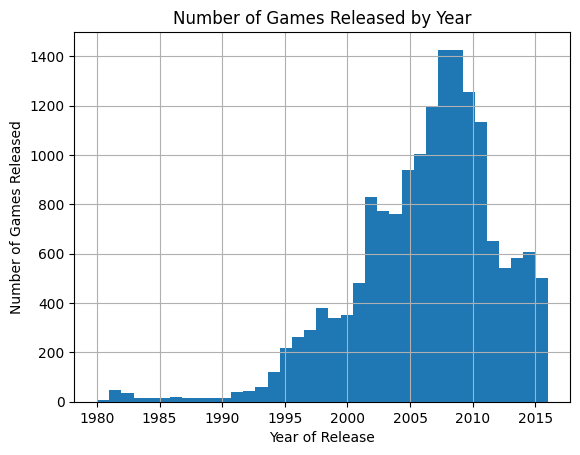

In [ ]:
df_known_year.hist(column='year_of_release', bins=37)
plt.xlabel(xlabel='Year of Release')
plt.ylabel('Number of Games Released')
plt.title('Number of Games Released by Year')
plt.show()

At a quick glance, we can see that the number of games began a steep and steady incline around 1994, peaking at 2008.  The number of games released was nearly cut in half between 2011 and 2012.

### Sales by Platform

Let's see how our sales vary from platform to platform.  We'll use only data where the year of release is known, as many of our determinations depends on knowing this year.

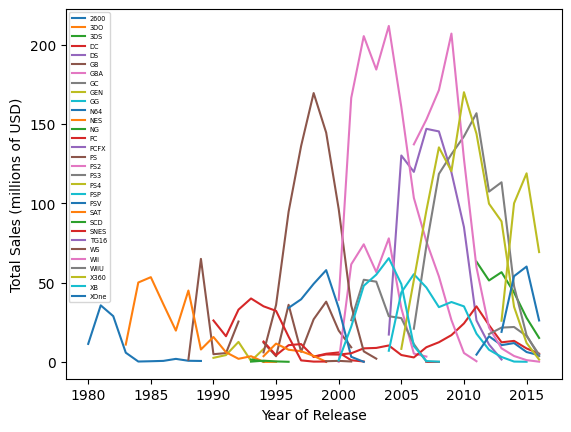

In [ ]:
dfp = df_known_year.pivot_table('total_sales', index='year_of_release', columns='platform', aggfunc='sum')
dfp.plot().legend(fontsize=4.7)
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (millions of USD)')
plt.show()

When we look at all of our platforms at once, our graph can be hard to read.  The legends is quite small, but the specific platform is not relevant for this first look.  Instead, we look at the general trends: While there are some consoles with staying power, most appear to have a lifetime.  Interestingly, the lifecycle of the platforms appears to change as the years go on, with higher peaks, but shorter lifespans.

Let's examine the platforms that had the highest cumulative sales over their lifetime.

In [ ]:
df_platform_sales = df_known_year.groupby('platform')['total_sales'].sum()
df_platform_sales.sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

In [ ]:
top_platform_list = df_platform_sales.sort_values(ascending=False).head(10).index.tolist()
top_platform_list

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

Using the list of top 10 platforms, we can refine our graph to the following:

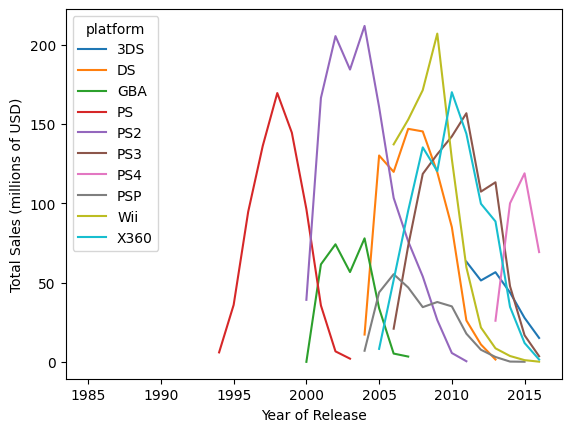

In [ ]:
dfp2 = df_known_year.query("platform in @top_platform_list").pivot_table('total_sales', index='year_of_release', columns='platform', aggfunc='sum')
dfp2.plot(xlabel='Year of Release', ylabel='Total Sales (millions of USD)')
plt.show()

From the graph above, it appears that the top platforms all have a lifetime of around 10 years, except for the PC.  Most peak right around 4-5 years old before sales decline at the same rate they previously grew.

This makes sense logically: four of the top platforms are part of the same series (PS, PS2, PS3, PS4).  As the new generation of the console is prepared for release, the sales for previous generations fall.  The PC is a bit of an outlier.  This is likely due to the fact that there is no "next generation" of PCs as there is with consoles; a newer, upgraded PC with better parts is still a PC even though its performance will be better.

### Limiting our Data

One of our goals is to plan a campaign for 2017 (next year in our world).  As such, it would make sense to understand which platforms are still actively releasing games.  Our pivot table below shows `total_sales` summed for each platform based on the `year_of_release` for games.

In [ ]:
#determine which platform is leading in sales, determine which are shrinking vs growing
with pd.option_context('display.max_columns', None):display(dfp.tail(6))

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011,NaN,NaN,63.20,NaN,26.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.03,NaN,NaN,0.45,156.78,NaN,17.82,4.63,NaN,NaN,NaN,NaN,NaN,59.65,NaN,143.84,NaN,NaN
2012,NaN,NaN,51.36,NaN,11.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.22,NaN,NaN,NaN,107.36,NaN,7.69,16.19,NaN,NaN,NaN,NaN,NaN,21.71,17.56,99.74,NaN,NaN
2013,NaN,NaN,56.57,NaN,1.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.38,NaN,NaN,NaN,113.25,25.99,3.14,10.59,NaN,NaN,NaN,NaN,NaN,8.59,21.65,88.58,NaN,18.96
2014,NaN,NaN,43.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.28,NaN,NaN,NaN,47.76,100.00,0.24,11.90,NaN,NaN,NaN,NaN,NaN,3.75,22.03,34.74,NaN,54.07
2015,NaN,NaN,27.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.52,NaN,NaN,NaN,16.82,118.90,0.12,6.25,NaN,NaN,NaN,NaN,NaN,1.14,16.35,11.96,NaN,60.14
2016,NaN,NaN,15.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.25,NaN,NaN,NaN,3.60,69.25,NaN,4.25,NaN,NaN,NaN,NaN,NaN,0.18,4.60,1.52,NaN,26.15


We can see that many platforms no longer have new games being made.

In [ ]:
not_null_plats = dfp.iloc[-1].notnull().index[dfp.iloc[-1].notnull()].tolist()
not_null_plats 

['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

Let's now look at our pivot table once more, this time only with platforms that had games released in 2016.

In [ ]:
dfp_final = df_known_year.query('platform in @not_null_plats').pivot_table('total_sales', index='year_of_release', columns='platform', aggfunc='sum')
dfp_final.tail(5)

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,
2012,51.36,23.22,107.36,NaN,16.19,21.71,17.56,99.74,NaN
2013,56.57,12.38,113.25,25.99,10.59,8.59,21.65,88.58,18.96
2014,43.76,13.28,47.76,100.00,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,4.25,0.18,4.60,1.52,26.15


From our table, we can see that games released in 2016 had the highest sales on the `PS4` platform.  Newer games seem to sell only on a few platforms: `3DS, PS4, and XOne`.  The `WiiU` has moderate sales for games in 2016.  Other consoles (except for `PC`) have relative low sales of games released in 2016.  This likely indicates that these consoles are approaching the end of their life cycle.

More importantly, we should focus on data that comes only after the market stablized.  The number of games sold per year leveled off around 2012.  Let's reduced our data from this point forward to only include information from games that were released in 2012 or later.

In [ ]:
df_reduced_years = df[df['year_of_release'] > 2011]

In [ ]:
df_reduced_years

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,st_user_score,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,82,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,81,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unrated,-1,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unrated,-1,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,53,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unrated,-1,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.0,unrated,-1,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,unrated,-1,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unrated,-1,0.01


### Sales of Games by Platform

Let's look at how individual games made after 2011 sell worldwide for each platform.

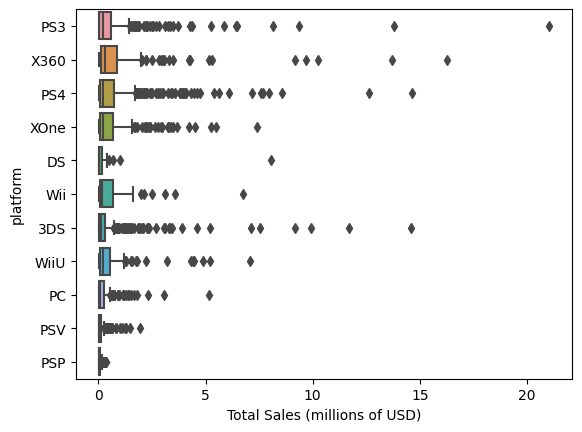

In [ ]:
box_fig = sns.boxplot(x=df_reduced_years['total_sales'], y=df_reduced_years['platform'], order=['PS3','X360','PS4','XOne','DS','Wii','3DS','WiiU','PC','PSV','PSP'])
plt.xlabel('Total Sales (millions of USD)')
plt.show()

We can see that the PS3 had the single best selling game that was released after 2011.  Our data is heavily consolidated in the 0-5 million range for sales.  Let's take a closer look at what is happening in the lower range.

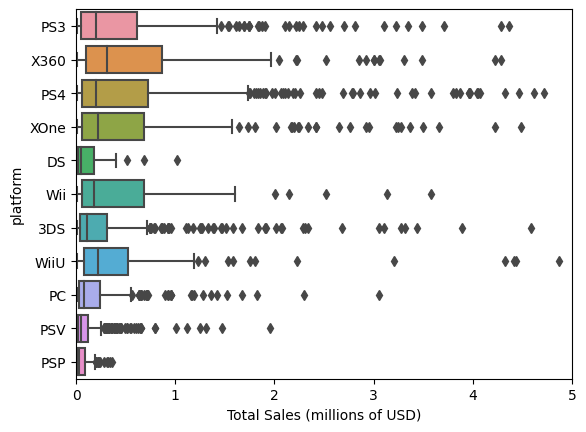

In [ ]:
sns.boxplot(x=df_reduced_years['total_sales'], y=df_reduced_years['platform'], order=['PS3','X360','PS4','XOne','DS','Wii','3DS','WiiU','PC','PSV','PSP'])
plt.xlim(0,5)
plt.xlabel('Total Sales (millions of USD)')
plt.show()

The `DS` and `PSP` are both smaller systems where the average game does not sell well (compared to other systems in our graph).  
The Xbox 360 has the highest median of all systems in the visualization.  In other words, the top 50% of games sold on the Xbox 360 brought in more revenue per game than the top 50% of any other system.

The `3DS` stands out as unique.  75& of the games sold on the 3DS (with our designated release years) bring in less than 0.5 million in total sales, but the platform has a large number of outliers with high total sales. From our first visualization, we can see that the largest outlier for the `3DS` was the third/fourth-best-selling game (very close to PS4 outlier of same sales) of all games released between 2012-2016.

### Correlation between Critic/User Scores and Total Sales

We'll take our `critic_score` and `user_score` columns into account next.  Let's see how these columns affect our `total_sales`.  We'd expect that the higher a game scores, the more it will sell.  Perhaps a user rating will be more effective than critic scores, as users may tend to rate a game based on general feeling of entertainment when compared to a critic working through a structured list of observations.  We'll first examine the Xbox 360 on its own.

In [ ]:
df_360u = df_reduced_years[df_reduced_years['user_score'] != -1]
df_360u = df_360u[df_360u.platform.isin(['X360'])]

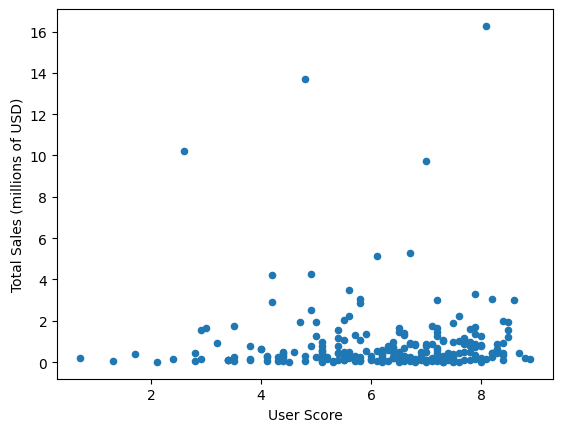

In [ ]:
df_360u.plot(kind='scatter', x='user_score', y='total_sales', xlabel='User Score', ylabel='Total Sales (millions of USD)')
plt.show()

In [ ]:
df_360u.user_score.corr(df_360u.total_sales)

0.006163978646213326

The user score of a game on the Xbox 360 has no correlation with the total sales that a game produces.

In [ ]:
df_360c = df_reduced_years[df_reduced_years['critic_score'] != -1]
df_360c = df_360c[df_360c.platform.isin(['X360'])]

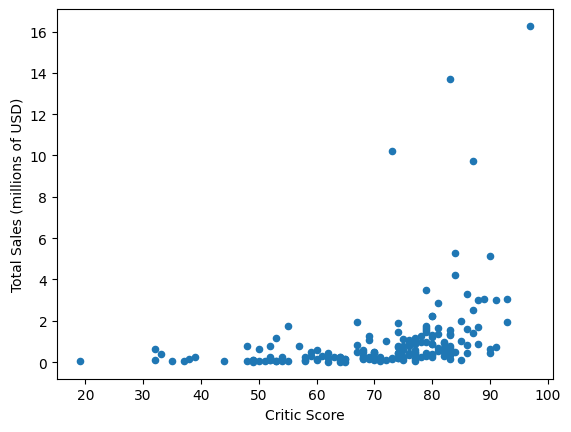

In [ ]:
df_360c.plot(kind='scatter', x='critic_score', y='total_sales', xlabel='Critic Score', ylabel='Total Sales (millions of USD)')
plt.show()

In [ ]:
df_360c.critic_score.corr(df_360c.total_sales)

0.3605734888507336

While our user score had no correlation with total sales, we can say that the Critic Score has a weak-to-moderate positive correlation on the Total Sales of a game.  Correllation does not equal causation, but it would be reasonable to say that there is a possible chance that a good Critic Score positively effects how well a game sells.

### Sales of the Same Game Across Different Platforms

Let's see how these scores affect sales with other platforms.  We'll look at the Xbox One next.

In [ ]:
df_xoneu = df_reduced_years[df_reduced_years['user_score'] != -1]
df_xoneu = df_xoneu[df_xoneu.platform.isin(['XOne'])]

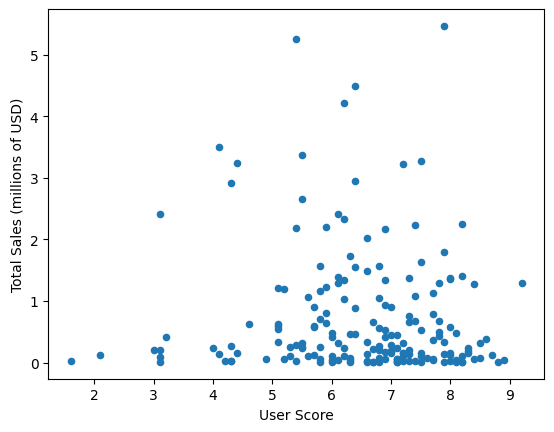

In [ ]:
df_xoneu.plot(kind='scatter', x='user_score', y='total_sales', xlabel='User Score', ylabel='Total Sales (millions of USD)')
plt.show()

In [ ]:
df_xoneu.user_score.corr(df_xoneu.total_sales)

-0.06892505328279414

In [ ]:
df_xonec = df_reduced_years[df_reduced_years['critic_score'] != -1]
df_xonec = df_xonec[df_xonec.platform.isin(['XOne'])]

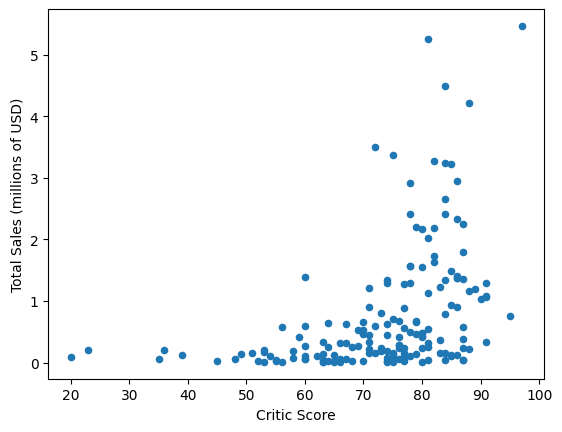

In [ ]:
df_xonec.plot(kind='scatter', x='critic_score', y='total_sales', xlabel='Critic Score', ylabel='Total Sales (millions of USD)')
plt.show()

In [ ]:
df_xonec.critic_score.corr(df_xonec.total_sales)

0.4169983280084017

Similarly to the Xbox 360, the User Scores for Xbox One games seems to have almost no correlation on total sales of the games.  If anything, there is a very weak negative correlation.  The Critic Score has a moderate positive correlation on the total sales of the game, just like with the 360.

Let's examine the 3DS next, as this platform had one of the more unique box plots.

In [ ]:
df_3dsu = df_reduced_years[df_reduced_years['user_score'] != -1]
df_3dsu = df_3dsu[df_3dsu.platform.isin(['3DS'])]

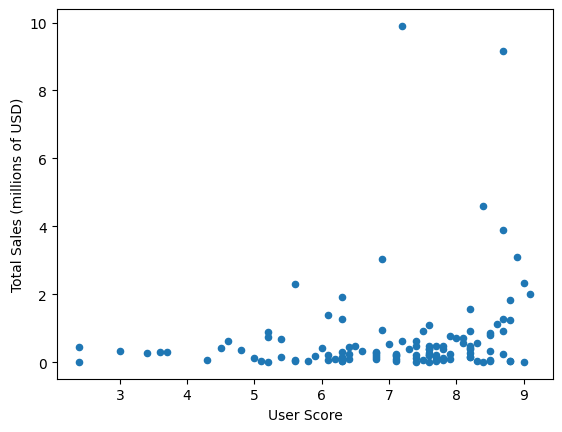

In [ ]:
df_3dsu.plot(kind='scatter', x='user_score', y='total_sales', xlabel='User Score', ylabel='Total Sales (millions of USD)')
plt.show()

In [ ]:
df_3dsu.user_score.corr(df_3dsu.total_sales)

0.19758263411038599

In [ ]:
df_3dsc = df_reduced_years[df_reduced_years['critic_score'] != -1]
df_3dsc = df_3dsc[df_3dsc.platform.isin(['3DS'])]

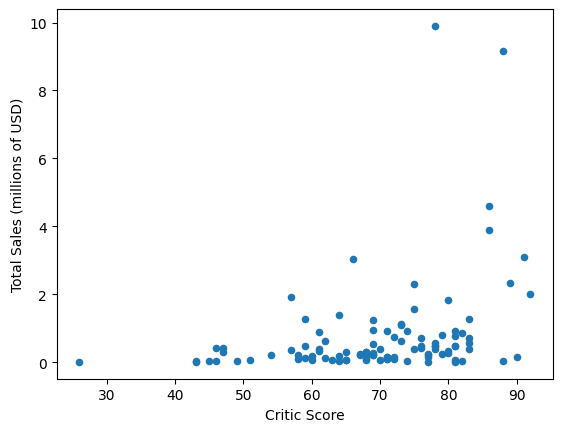

In [ ]:
df_3dsc.plot(kind='scatter', x='critic_score', y='total_sales', xlabel='Critic Score', ylabel='Total Sales (millions of USD)')
plt.show()

In [ ]:
df_3dsc.critic_score.corr(df_3dsc.total_sales)

0.3208028695360785

The 3DS has a different trend than the Xbox Consoles do.  User score appears to have a weak positive correlation to total sales of a game.  The critic score also has a weak positive correlation to total sales, but this correlation coefficient is less than those of the Xbox Consoles.  Perhaps gamers that play 3DS games care much more about how other gamers score the games they play.

### Game Genre's Effect on Sales

In [ ]:
#Original attempt reserved per comments made
'''
genre_sales = df_reduced_plats.groupby('genre', as_index=False)['total_sales'].sum()
sns.barplot(x='total_sales', y='genre', data=df_reduced_plats, estimator=np.median, ci=None)
display(genre_sales)
plt.xlabel('Median Total Sales (millions of USD)')
plt.show()
'''

"\ngenre_sales = df_reduced_plats.groupby('genre', as_index=False)['total_sales'].sum()\nsns.barplot(x='total_sales', y='genre', data=df_reduced_plats, estimator=np.median, ci=None)\ndisplay(genre_sales)\nplt.xlabel('Median Total Sales (millions of USD)')\nplt.show()\n"

Let's examine how the `genre` may affect sales. 

,genre,total_sales
0,Action,441.12
8,Shooter,304.73
7,Role-Playing,192.80
10,Sports,181.07
3,Misc,85.04
4,Platform,61.00
6,Racing,53.50
2,Fighting,44.49
9,Simulation,35.12
1,Adventure,29.43


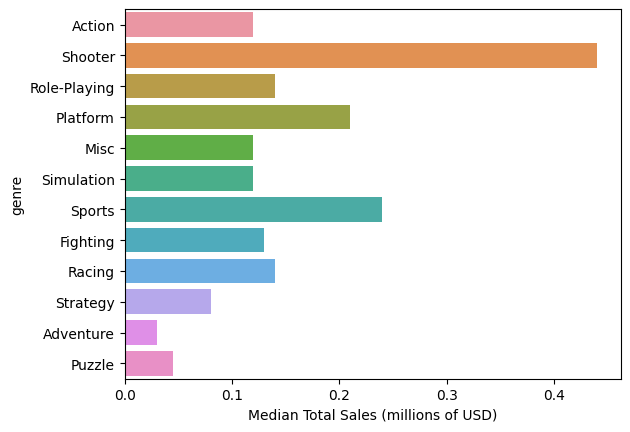

In [ ]:
genre_sales2 = df_reduced_years.groupby('genre', as_index=False)['total_sales'].sum()
bar_fig = sns.barplot(x='total_sales', y='genre', data=df_reduced_years, estimator=np.median, ci=None)
display(genre_sales2.sort_values(by='total_sales', ascending=False))
plt.xlabel('Median Total Sales (millions of USD)')
plt.show()

In [ ]:
#values for graph above
df_reduced_years.groupby('genre')['total_sales'].median()

genre
Action          0.120
Adventure       0.030
Fighting        0.130
Misc            0.120
Platform        0.210
Puzzle          0.045
Racing          0.140
Role-Playing    0.140
Shooter         0.440
Simulation      0.120
Sports          0.240
Strategy        0.080
Name: total_sales, dtype: float64

We can see that while our `Action` and `Shooter` genres have the highest `total_sales`. the data changes when we examine the median `total_sales` of each genre.  Our `Shooter` genre is the clear winner when we look at the median total sales.  In other words, we would say that 50% of `Shooter` games had at least 0.440 million in `total_sales`.   The `Platform` genre performs second-best, but each `Platform` game sells only about half as much as a shooter game does.  We know that `Shooter` games will be a safe bet in 2017, as they have both high total and median sales.  Interestingly, `Action` games have one of the lower median total sales. The high `total_sales` number that we see is likely due to the sheer number of Action games that sell.

### Region Profiles

From here, let's examine each region more closely by building a user profile.  For each region, we'll find:
- the top five platforms
- the top five genres
- the effect of ESRB ratings between individual groups

Let's look at North America first:

In [ ]:
df_reduced_years.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)

platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64

In [ ]:
df_reduced_years.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)

genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64

In [ ]:
df_reduced_years.groupby('rating')['na_sales'].median().sort_values(ascending=False)

rating
M          0.155
E10+       0.130
E          0.070
T          0.050
unrated    0.000
Name: na_sales, dtype: float64

In North America, the Xbox360 platform had the highest sales over the last 5 years.  Action, then Shooter genres sell best.  Games that are rated M had the highest sales, with E10+ close behind.      

Next we'll look at Europe's profile.

In [ ]:
#eu profile
df_reduced_years.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)

platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64

In [ ]:
df_reduced_years.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)

genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64

In [ ]:
df_reduced_years.groupby('rating')['eu_sales'].median().sort_values(ascending=False)

rating
M          0.13
E10+       0.11
E          0.06
T          0.04
unrated    0.00
Name: eu_sales, dtype: float64

In Europe, the Playstation 4 is the highest selling platform. Action and Shooter generes remain on top, as in North America.  Once again, games that are rated M sell best, with E10+ close behind.

Next is Japan's:

In [ ]:
df_reduced_years.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64

In [ ]:
df_reduced_years.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64

In [ ]:
df_reduced_years.groupby('rating')['jp_sales'].median().sort_values(ascending=False)

rating
unrated    0.03
T          0.01
E          0.00
E10+       0.00
M          0.00
Name: jp_sales, dtype: float64

Japan is unique from the other regions.  Whereas non-Japanese regions prefer Xbox360 and PS4, Japan's sales are focused heavily on the 3DS.  If marketing in Japan, it is clear that the handheld console should be targeted.  Japanese gamers heavily prefer Role-Playing games over other genres, with Action games coming in second.  Rating holds little weight in Japan.

Finally, we have all other regions:

In [ ]:
df_reduced_years.groupby('platform')['other_sales'].sum().sort_values(ascending=False).head(5)

platform
PS4     48.35
PS3     43.26
X360    20.40
XOne    14.27
3DS      8.87
Name: other_sales, dtype: float64

In [ ]:
df_reduced_years.groupby('genre')['other_sales'].sum().sort_values(ascending=False).head(5)

genre
Action          51.14
Shooter         37.26
Sports          22.44
Role-Playing    14.83
Misc             7.67
Name: other_sales, dtype: float64

In [ ]:
df_reduced_years.groupby('rating')['other_sales'].median().sort_values(ascending=False)

rating
M          0.04
E10+       0.03
E          0.02
T          0.01
unrated    0.00
Name: other_sales, dtype: float64

Other regions most closely follow the patterns of EU.  Action and Shooter games are once again on top.  PS4 is favored, with PS3 in second place for sales.  Rated M games sell highest, with E10+ right behind.

Overall, a few patterns emerge:

- All non-JP regions have similar tendencies.  Action and Shooter games are the best selling genres, and rated M games sell more than games of other ratings.  North America has a preference for the Xbox 360, while all other non-JP regions prefer the PS4.
- The Japan region has a unique profile unlike other regions.  The 3DS platform has the highest sales.  While Action games still sell well, the Role-Playing genre is the best selling genre.
- Action games are popular in all regions.  The Action genre is the highest selling genre in all non-Japanese regions; in Japan the Action genre is the second-best selling genre. 

## Statistical Data Analysis

While our examination above is important, we must also test our findings statistically.  We'll test two ideas:

1. Are the average user ratings of the Xbox One and PC the same?
2. Do the average user ratings for Action and Sports genres differ?

### Test 1

For our first question we'll use the following hypotheses:
- Null hypothesis: The mean user rating of the Xbox One and PC platforms are the same.
- Alternative hypothesis: The mean user rating of the Xbox One and PC platforms are different.

As we are trying to determine if the means of two sttistical populations are equal to each other, we'll use our two-tailed test.  We'll take all the values in the `user_score` column and filter out values for both the `XOne` and `PC` platforms.

In [ ]:
dftest1 = df_reduced_years[df_reduced_years['user_score']!= -1]
xbox_vals = dftest1[dftest1.platform.isin(['XOne'])]['user_score'].values
pc_vals = dftest1[dftest1.platform.isin(['PC'])]['user_score'].values

alpha=0.05

results = st.ttest_ind(xbox_vals, pc_vals, equal_var = False)

print('pvalue:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We cannot reject the null hypothesis")

pvalue: 0.5489537965134912
We cannot reject the null hypothesis


Our p value tells us that there is a roughly 54.9% chance of obtaining the observed results if the null hypothesis were true.  In other words, if the mean user rating of the Xbox One and PC Platforms are the same, there is a ~54.9% chance that we would have obtained our observed results.

With such a probability, we cannot reject our null hypothesis.  There is a decent chance that the population means are the same. 

### Test 2

For our second question we'll use the following hypotheses:
- Null hypothesis: The mean user rating for the Action and Sports genres are the same.
- Alternative hypothesis: The mean user rating for the Action and Sports genres are not the same.

We'll use the same type of test, as we are once again testing if two statistical population means are equal to each other.  This time, we'll take the values based on `genre` rather than `platform`.

In [ ]:
action_vals = dftest1[dftest1.genre.isin(['Action'])]['user_score'].values
sports_vals = dftest1[dftest1.genre.isin(['Sports'])]['user_score'].values

alpha = 0.05

results = st.ttest_ind(action_vals, sports_vals, equal_var = False)

print('pvalue: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis.")
else:
    print("We cannot reject the null hypothesis.")

pvalue:  4.24307776572644e-20
We reject the null hypothesis.


From out test above, we reject our null hypothesis that the mean user rating for the Action and Sports genres are the same.  In this case we accept that the genres have different average user ratings.

In [ ]:
# Reviewer's code 1.1
'''
l = {'A':[1,2,4], 'B':[3,3,5]}

df1 = pd.DataFrame(l)

df2 = df1

df3 = df1.copy() 

display(df1, df2, df3)'''

"\nl = {'A':[1,2,4], 'B':[3,3,5]}\n\ndf1 = pd.DataFrame(l)\n\ndf2 = df1\n\ndf3 = df1.copy() \n\ndisplay(df1, df2, df3)"

In [ ]:
# Reviewer's code 1.2
'''
df2.loc[0, 'A'] = 'change2'

df3.loc[1, 'A'] = 'change3'

display(df1, df2, df3)'''

"\ndf2.loc[0, 'A'] = 'change2'\n\ndf3.loc[1, 'A'] = 'change3'\n\ndisplay(df1, df2, df3)"

## Conclusions

Platforms appear to have a lifetime of roughly 10 years, except for the PC. Most platforms experience peak sales around the 4-5 year mark, before sales decline at the same rate they previously grew.  This makes sense logically: As a new generation of console is prepared for release, the sales for previous generations fall.  Thus we should ensure that we prioritize newer platforms, and ignore platforms that are on their way out of circulation.

It is clear that individual games on the PS4 sold well in all regions, though these sales were less strong in Japan.  Instead, Japanese gamers preferred the 3DS.  The Xbox 360 was strongest in North America, but the PS4 still had high sales here.  The ratings for games sold in Japan also differed from other regions.  While other regions preferred games that were rated M, "unrated" was the highest selling category in Japan.  

Overall, we discovered that Action and Shooter genres have the highest total sales. Our Shooter genre is likely the safest to market towards, as median sales for Shooters are highest in the genre.

Surprisingly, user score seems to have little effect on the total sales of a game overall, though there was a correlation for 3DS games specifically.  Critic scores have a weak-to-moderate correlation with total sales when examining Xbox Consoles and the 3DS platforms specifically.

- <ins>one important thing to note before mentioning our key points</ins>: while the Xbox360 may have the highest sales of the last 5 years, sales for games released in 2016 are nearly non existant.  This indicates that this console's lifecycle is likely over, and the newer generation of consoles will likely have higher sales in the coming years.

Overall, a few patterns emerge:

- All non-JP regions have similar tendencies.  Action and Shooter games are the best selling genres, and rated M games sell more than games of other ratings.  North America has a preference for the Xbox 360, while all other non-JP regions prefer the PS4.
- The Japan region has a unique profile unlike other regions.  The 3DS platform has the highest sales.  While Action games still sell well, the Role-Playing genre is the best selling genre.
- Action games are popular in all regions.  The Action genre is the highest selling genre in all non-Japanese regions; in Japan the Action genre is the second-best selling genre. 